# Using JWST Guide Star Data Products
## Introduction

<a id="Introduction"></a>

Thus notebook demonstrates code for retrieving and plotting JWST guiding data products. These provide a record of the line-of-sight guiding during science observations. If you want to check on the guiding performance during some particular science observations, this is one way to do that. 

The actual function code that does the heavy lifting is in the `misc_jwst.guiding_analyses.py` file, in this repository. 

The guide star files may be retrieved from MAST via the <a href="https://astroquery.readthedocs.io/en/latest/mast/mast.html">astroquery.mast</a> interface. This does so, then generates some potentially-informative plots.

Credit to Dick Shaw and Rick White of the STScI Archive Sciences Branch team for guidance in implementing the MAST query portion of this.

In [1]:
%pylab inline

from misc_jwst import guiding_analyses

%pylab is deprecated, use %matplotlib inline and import the required libraries.
Populating the interactive namespace from numpy and matplotlib


**WARNING**: LOCAL JWST PRD VERSION PRDOPSSOC-062 DOESN'T MATCH THE CURRENT ONLINE VERSION PRDOPSSOC-063
Please consider updating pysiaf, e.g. pip install --upgrade pysiaf or conda update pysiaf


## Search for and Retrieve Guide Star Data

The function `find_relevant_guiding_file` takes as input a filename for some JWST science data product. The header information is used to look up from MAST the filename for the calibrated guiding data that corresponds to that time period. This file is then automatically downloaded from MAST into the current directory. 

In [2]:
sci_filename = './jw02725387001_03105_00001_nrca3_rate.fits'

In [9]:
gs_filenames = guiding_analyses.find_relevant_guiding_file(sci_filename)

For science data file: ./jw02725387001_03105_00001_nrca3_rate.fits
Found guiding telemetry files:
    jw02725387001_gs-fg_2022207164836_cal.fits
    jw02725387001_gs-fg_2022207165907_cal.fits
    jw02725387001_gs-fg_2022207170616_cal.fits
    jw02725387001_gs-fg_2022207170944_cal.fits
[-5723. -4652.    57.   385.]
[ nan  nan  57. 385.]
Based on science DATE-END keyword and guiding timestamps, the matching GS file is: 
    jw02725387001_gs-fg_2022207170616_cal.fits
    t_end = 2022207170559	 delta = 57
ALREADY DOWNLOADED:  ./jw02725387001_gs-fg_2022207170616_cal.fits


Some longer exposures have guiding data split across multiple files, so the filenames are always returned as a list. In this case, there's only one guiding file found.

In [10]:
gs_filenames

['./jw02725387001_gs-fg_2022207170616_cal.fits']

## Plot guiding time series data during and around that exposure

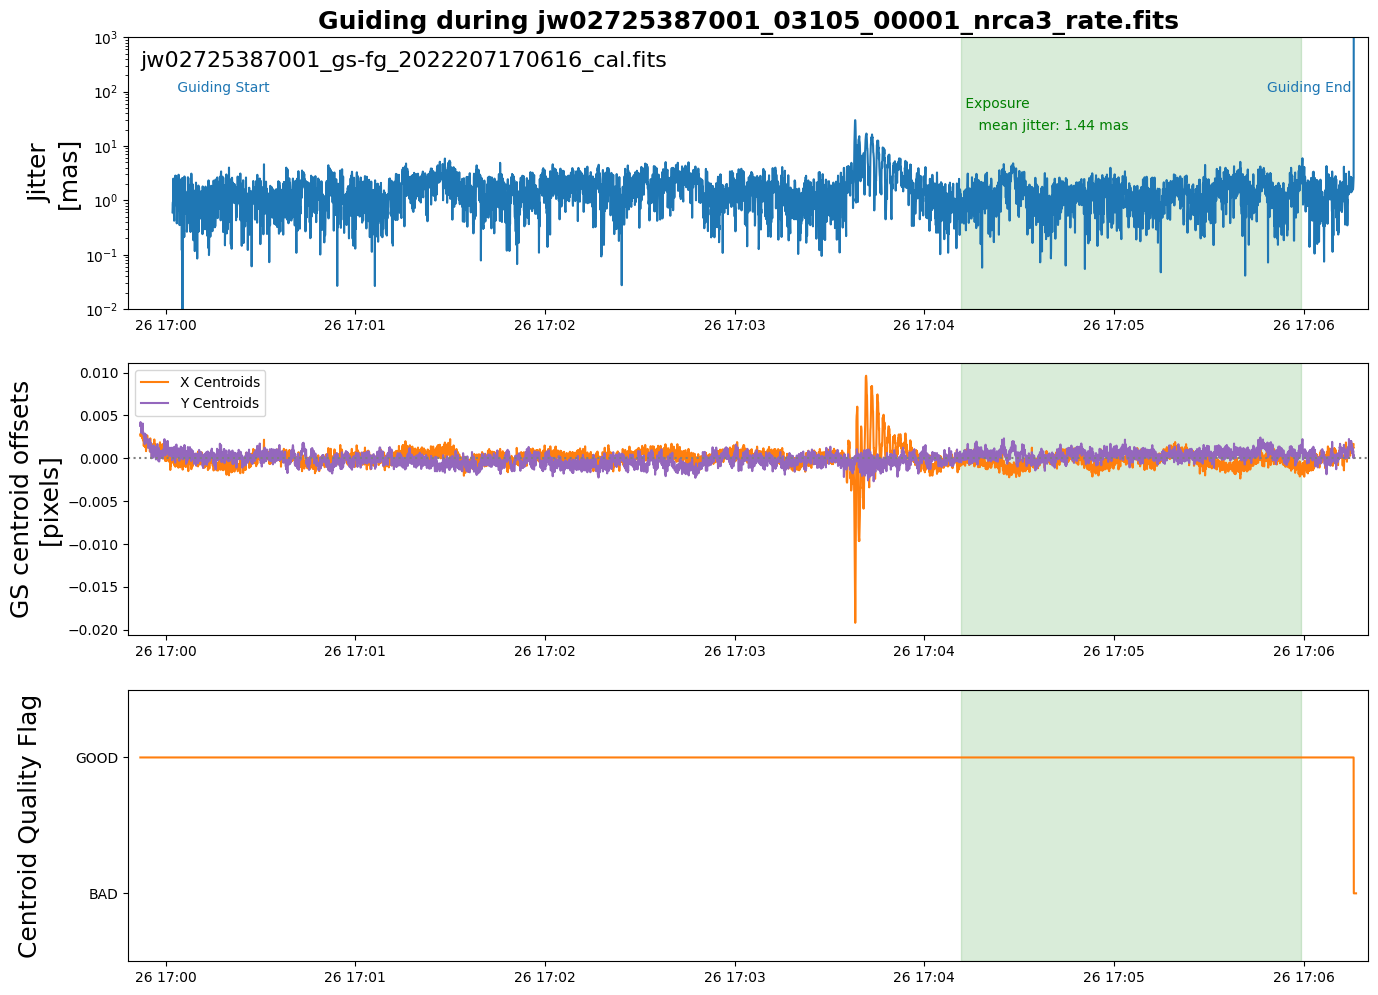

In [11]:
guiding_analyses.guiding_performance_plot(sci_filename)

You can also look at the guiding performance as a 'jitter ball' plot, whcih displays the pointing stability during the time of the observation:

0.0006224999507368572


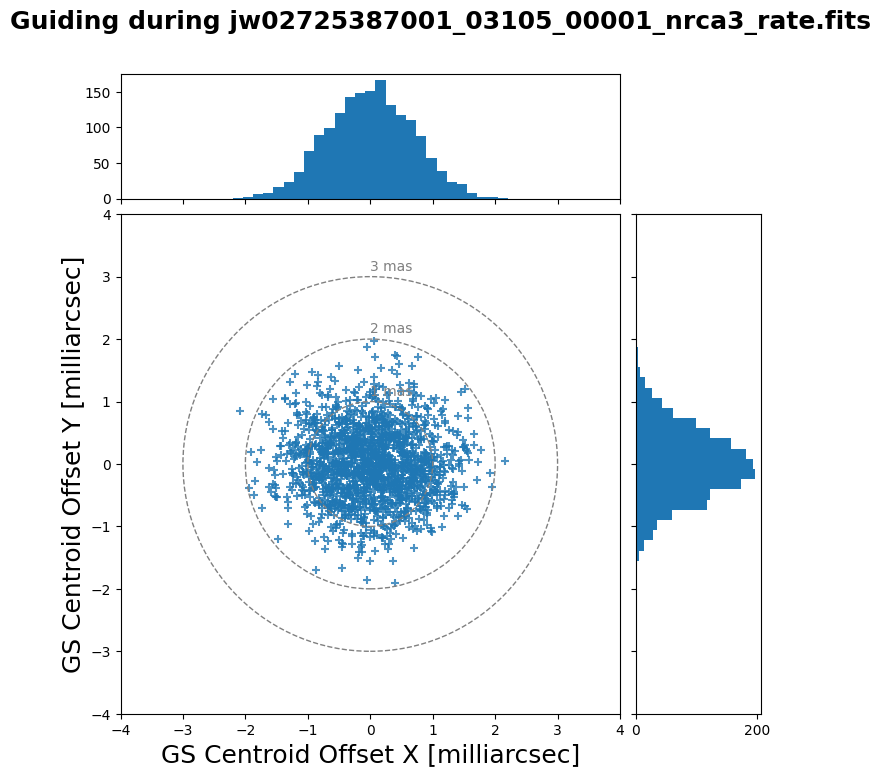

In [13]:
guiding_analyses.guiding_performance_jitterball(sci_filename)

## Displaying Guide Star ID images

Usually the guider is only taking small postage stamps while guiding, but full-frame images are used at the
start of each visit to locate and identify onto the guide star.  These too can be plotted. 

There may be up to 9 ID images per visit (3 candidates times up to 3 attempts each). 
This function will automatically retrieve them from MAST into the current directory. 


For science data file: ./jw02725387001_03105_00001_nrca3_rate.fits
Found guiding ID image files:
    jw02725387001_gs-id_1_image_cal.fits
COMPLETE:  ./jw02725387001_gs-id_1_image_cal.fits
Found a total of 1 ID images for that observation.
Loading and plotting ID images...
Output saved to V02725387001_ID_images.pdf


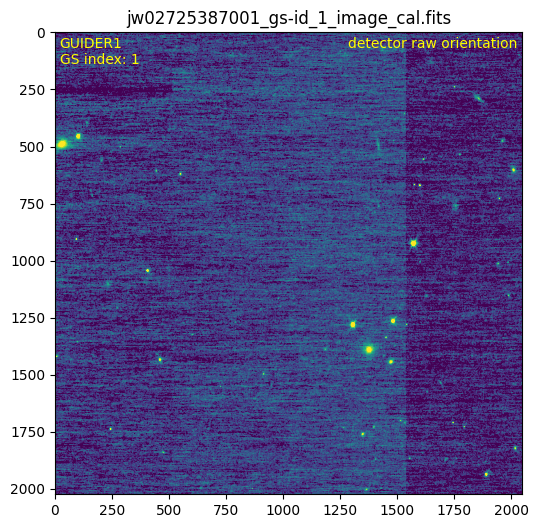

In [3]:
guiding_analyses.retrieve_and_display_id_images(sci_filename)

**STScI internal:** If you retrieve the OSS visit file for that observation, and have it in the current directory, then the guide star and reference star coordinates commanded will be read from that file and overplotted. 

The display is a little busy in the case of this example. But you can see that the commanded stars are all slightly up and right of the nominal locations. The FGS ID-Acq-track process easily corrected for this. 


For science data file: ./jw02725387001_03105_00001_nrca3_rate.fits
Found guiding ID image files:
    jw02725387001_gs-id_1_image_cal.fits
ALREADY DOWNLOADED:  ./jw02725387001_gs-id_1_image_cal.fits
Found a total of 1 ID images for that observation.
Loading and plotting ID images...
Found visit file V02725387001.vst
Parsing V02725387001.vst
Retrieving and plotting guide star info from visit file
Output saved to V02725387001_ID_images.pdf


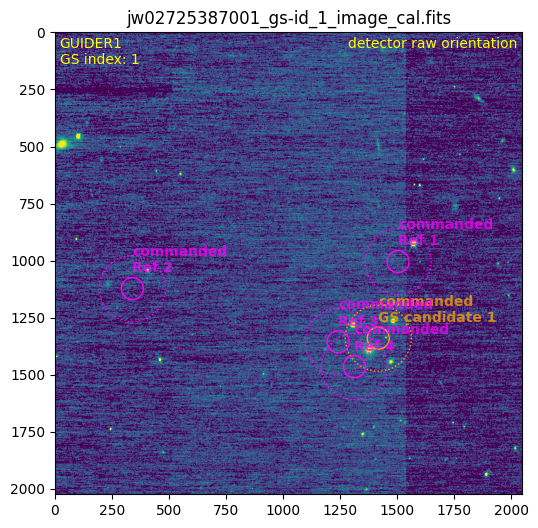

In [3]:
guiding_analyses.retrieve_and_display_id_images(sci_filename)

## About this notebook

Based in part on a notebook developed by Archive Sciences Branch staff, chiefly Dick Shaw and Rick White. For support, please contact the Archive HelpDesk at archive@stsci.edu, or through the [JWST HelpDesk Portal](https://jwsthelp.stsci.edu). 
<img style="float: right;" src="https://raw.githubusercontent.com/spacetelescope/notebooks/master/assets/stsci_pri_combo_mark_horizonal_white_bkgd.png" alt="Space Telescope Logo" width="200px"/>